## 📘 01_eda.ipynb – Análisis Exploratorio de Datos (EDA)

Este notebook realiza un análisis exploratorio del dataset de diabetes.  
Los objetivos son:

- Comprender la estructura del dataset.
- Identificar valores faltantes o inconsistentes.
- Visualizar distribuciones, correlaciones y relaciones clave.
- Generar hallazgos útiles para el preprocesamiento y la selección de variables.

> **Fuente de los datos:**  
> https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database




### 1. Carga del dataset y configuración de librerías


In [ ]:
# Imports y configuración
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo visual
sns.set(style="whitegrid")
%matplotlib inline

#  Cargar datos
df = pd.read_csv("../data/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 2. Información general del dataset


In [ ]:
#  Información general del dataset
df.info()
df.describe()
df.isnull().sum()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


0

Hallazgos iniciales

- El dataset contiene 768 registros y 9 variables.
- No hay valores nulos explícitos en ninguna columna.
- Se detectan valores mínimos de cero en variables clínicas (`Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `BMI`), lo cual es poco realista y será tratado como valor faltante en el preprocesamiento.


### 3. Distribución de la variable objetivo (Outcome)

Text(0, 0.5, 'Número de pacientes')

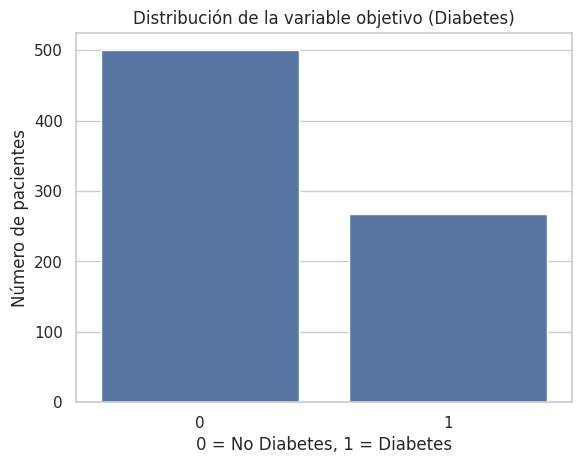

In [ ]:
# Distribución de la variable objetivo
sns.countplot(data=df, x="Outcome")
plt.title("Distribución de la variable objetivo (Diabetes)")
plt.xlabel("0 = No Diabetes, 1 = Diabetes")
plt.ylabel("Número de pacientes")

Distribución de la variable objetivo

- El dataset está desbalanceado: 500 negativos (no diabetes) y 268 positivos (diabetes).
- Este desbalance será considerado durante el modelado, priorizando métricas como F1-score y recall.


### 4. Matriz de correlación entre variables

Text(0.5, 1.0, 'Matriz de correlación entre variables')

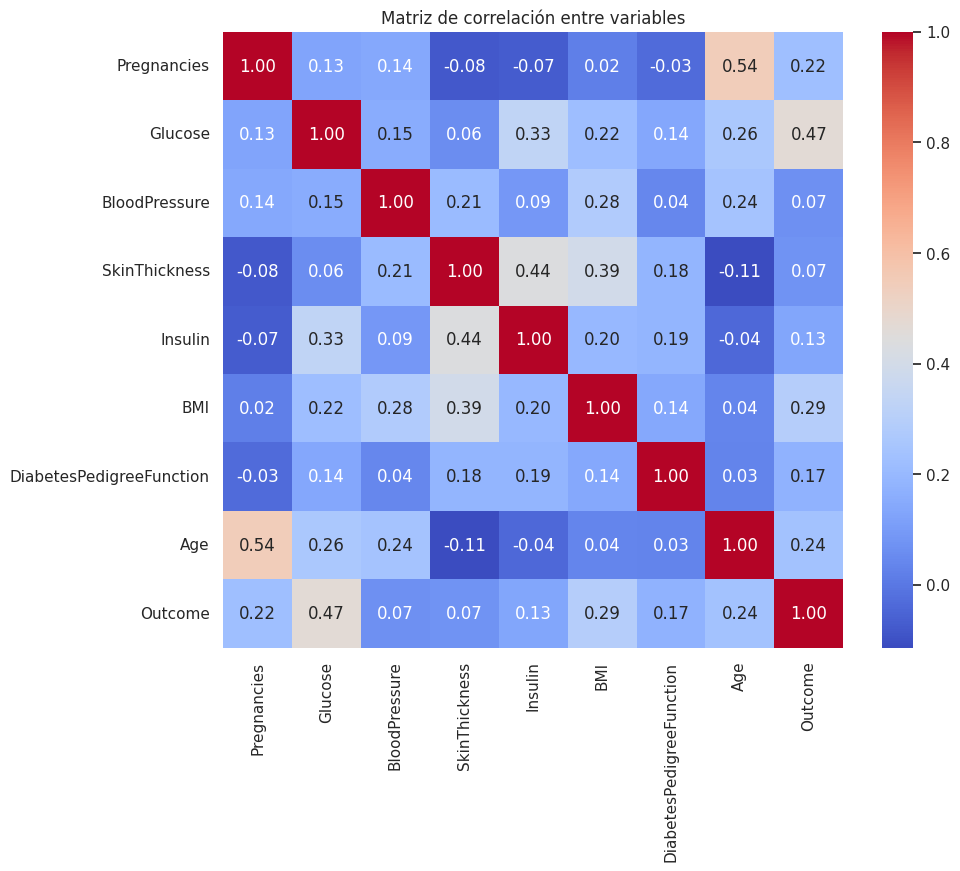

In [ ]:
#  Visualización de correlaciones
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación entre variables")

### Análisis de correlaciones

- La glucosa (`Glucose`) es la variable más correlacionada con el diagnóstico de diabetes (`Outcome`), con un coeficiente de 0.47.
- Otras variables como IMC (`BMI`), edad (`Age`) y embarazos (`Pregnancies`) también tienen correlaciones positivas con el diagnóstico, pero menores.
- No se detectan pares de variables independientes con correlación mayor a 0.8, por lo que **no existe evidencia de multicolinealidad severa**. Esto es positivo, ya que permite que los modelos aprovechen toda la información de las variables sin redundancia significativa ni riesgos de inestabilidad en los coeficientes.


### 5. Histogramas de las variables

Text(0.5, 0.98, 'Distribución de variables')

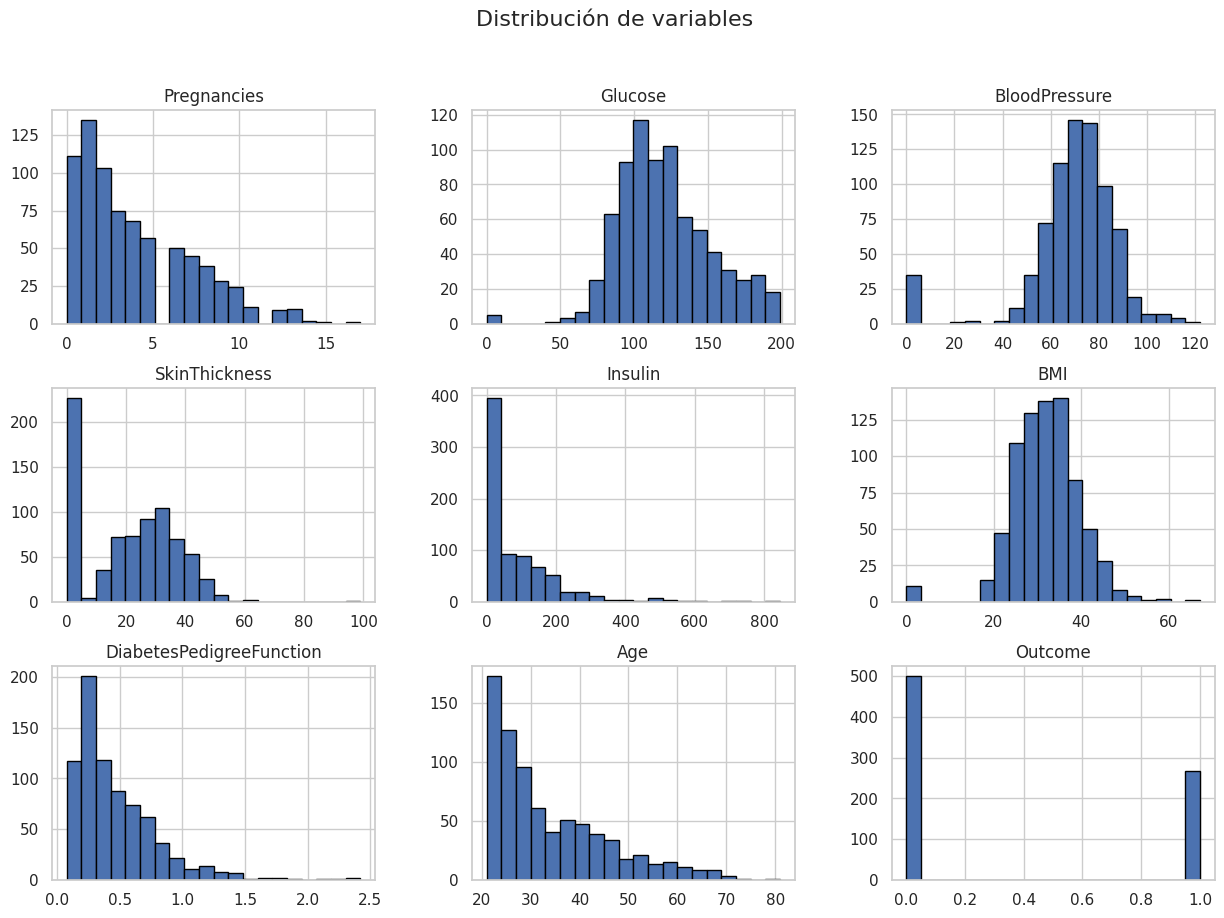

In [ ]:
# Histogramas de las variables
df.hist(figsize=(15,10), bins=20, edgecolor='black')
plt.suptitle("Distribución de variables", fontsize=16)

### 6. Outliers y valores extremos

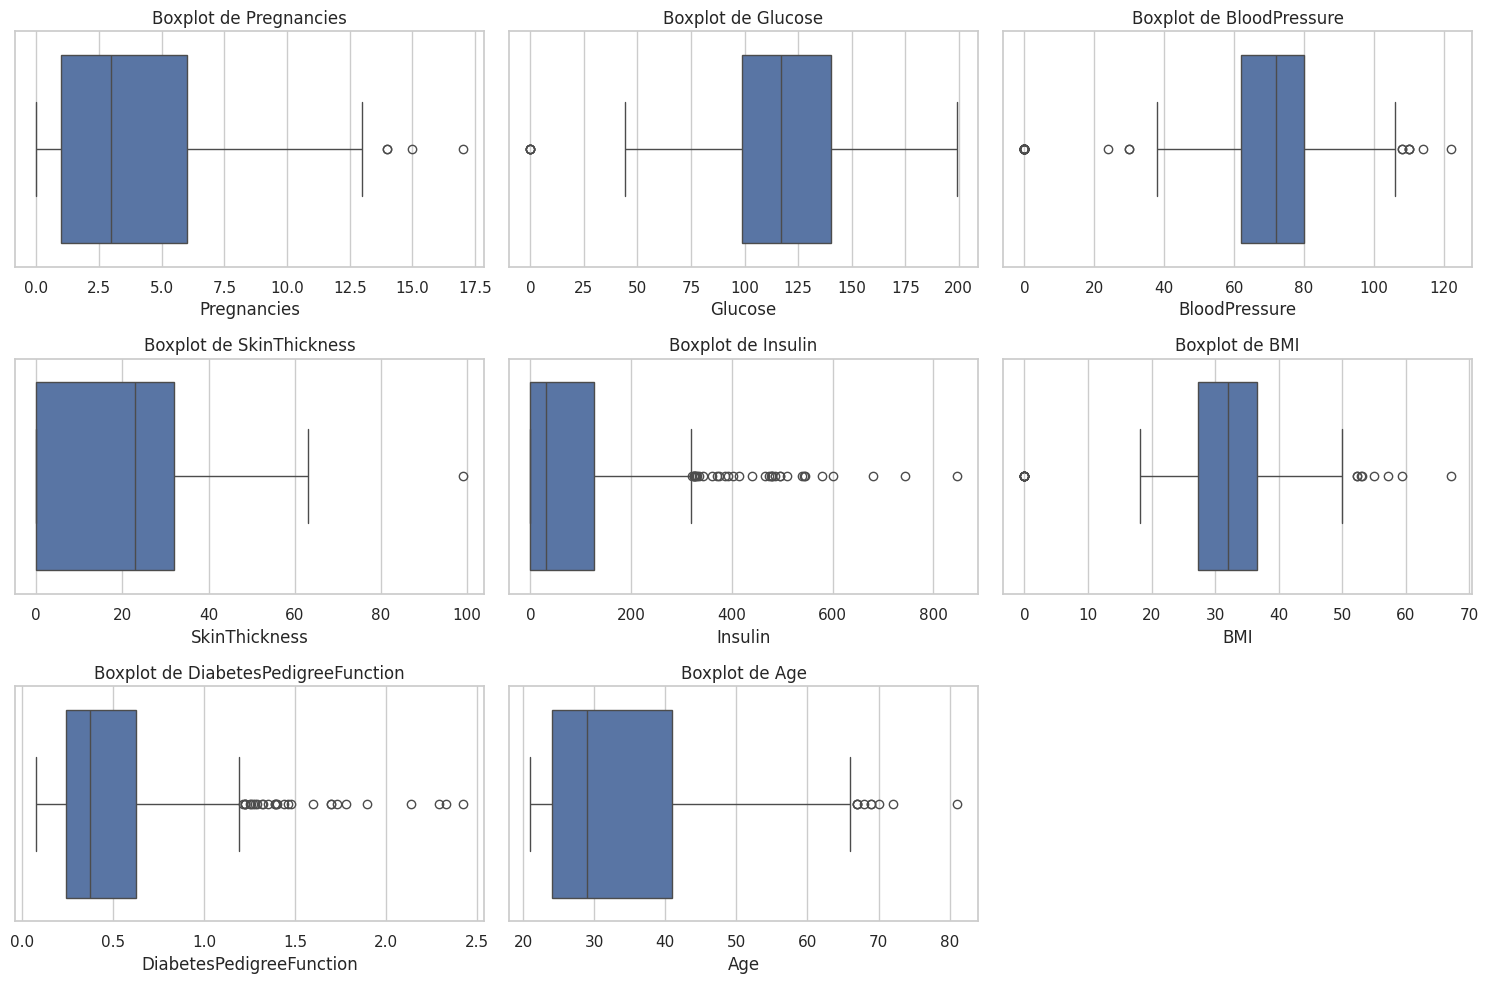

In [ ]:
#  Outliers y valores extremos
features = df.columns[:-1]  # Excluye la columna 'Outcome'
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[feature])
    plt.title(f"Boxplot de {feature}")
plt.tight_layout()

Outliers y valores extremos
- Se identifican algunos valores atípicos en `Insulin` y `SkinThickness`.
- Estos outliers serán revisados en el preprocesamiento para decidir si deben ser tratados o conservados.

### 7 Visualización de pares de variables.

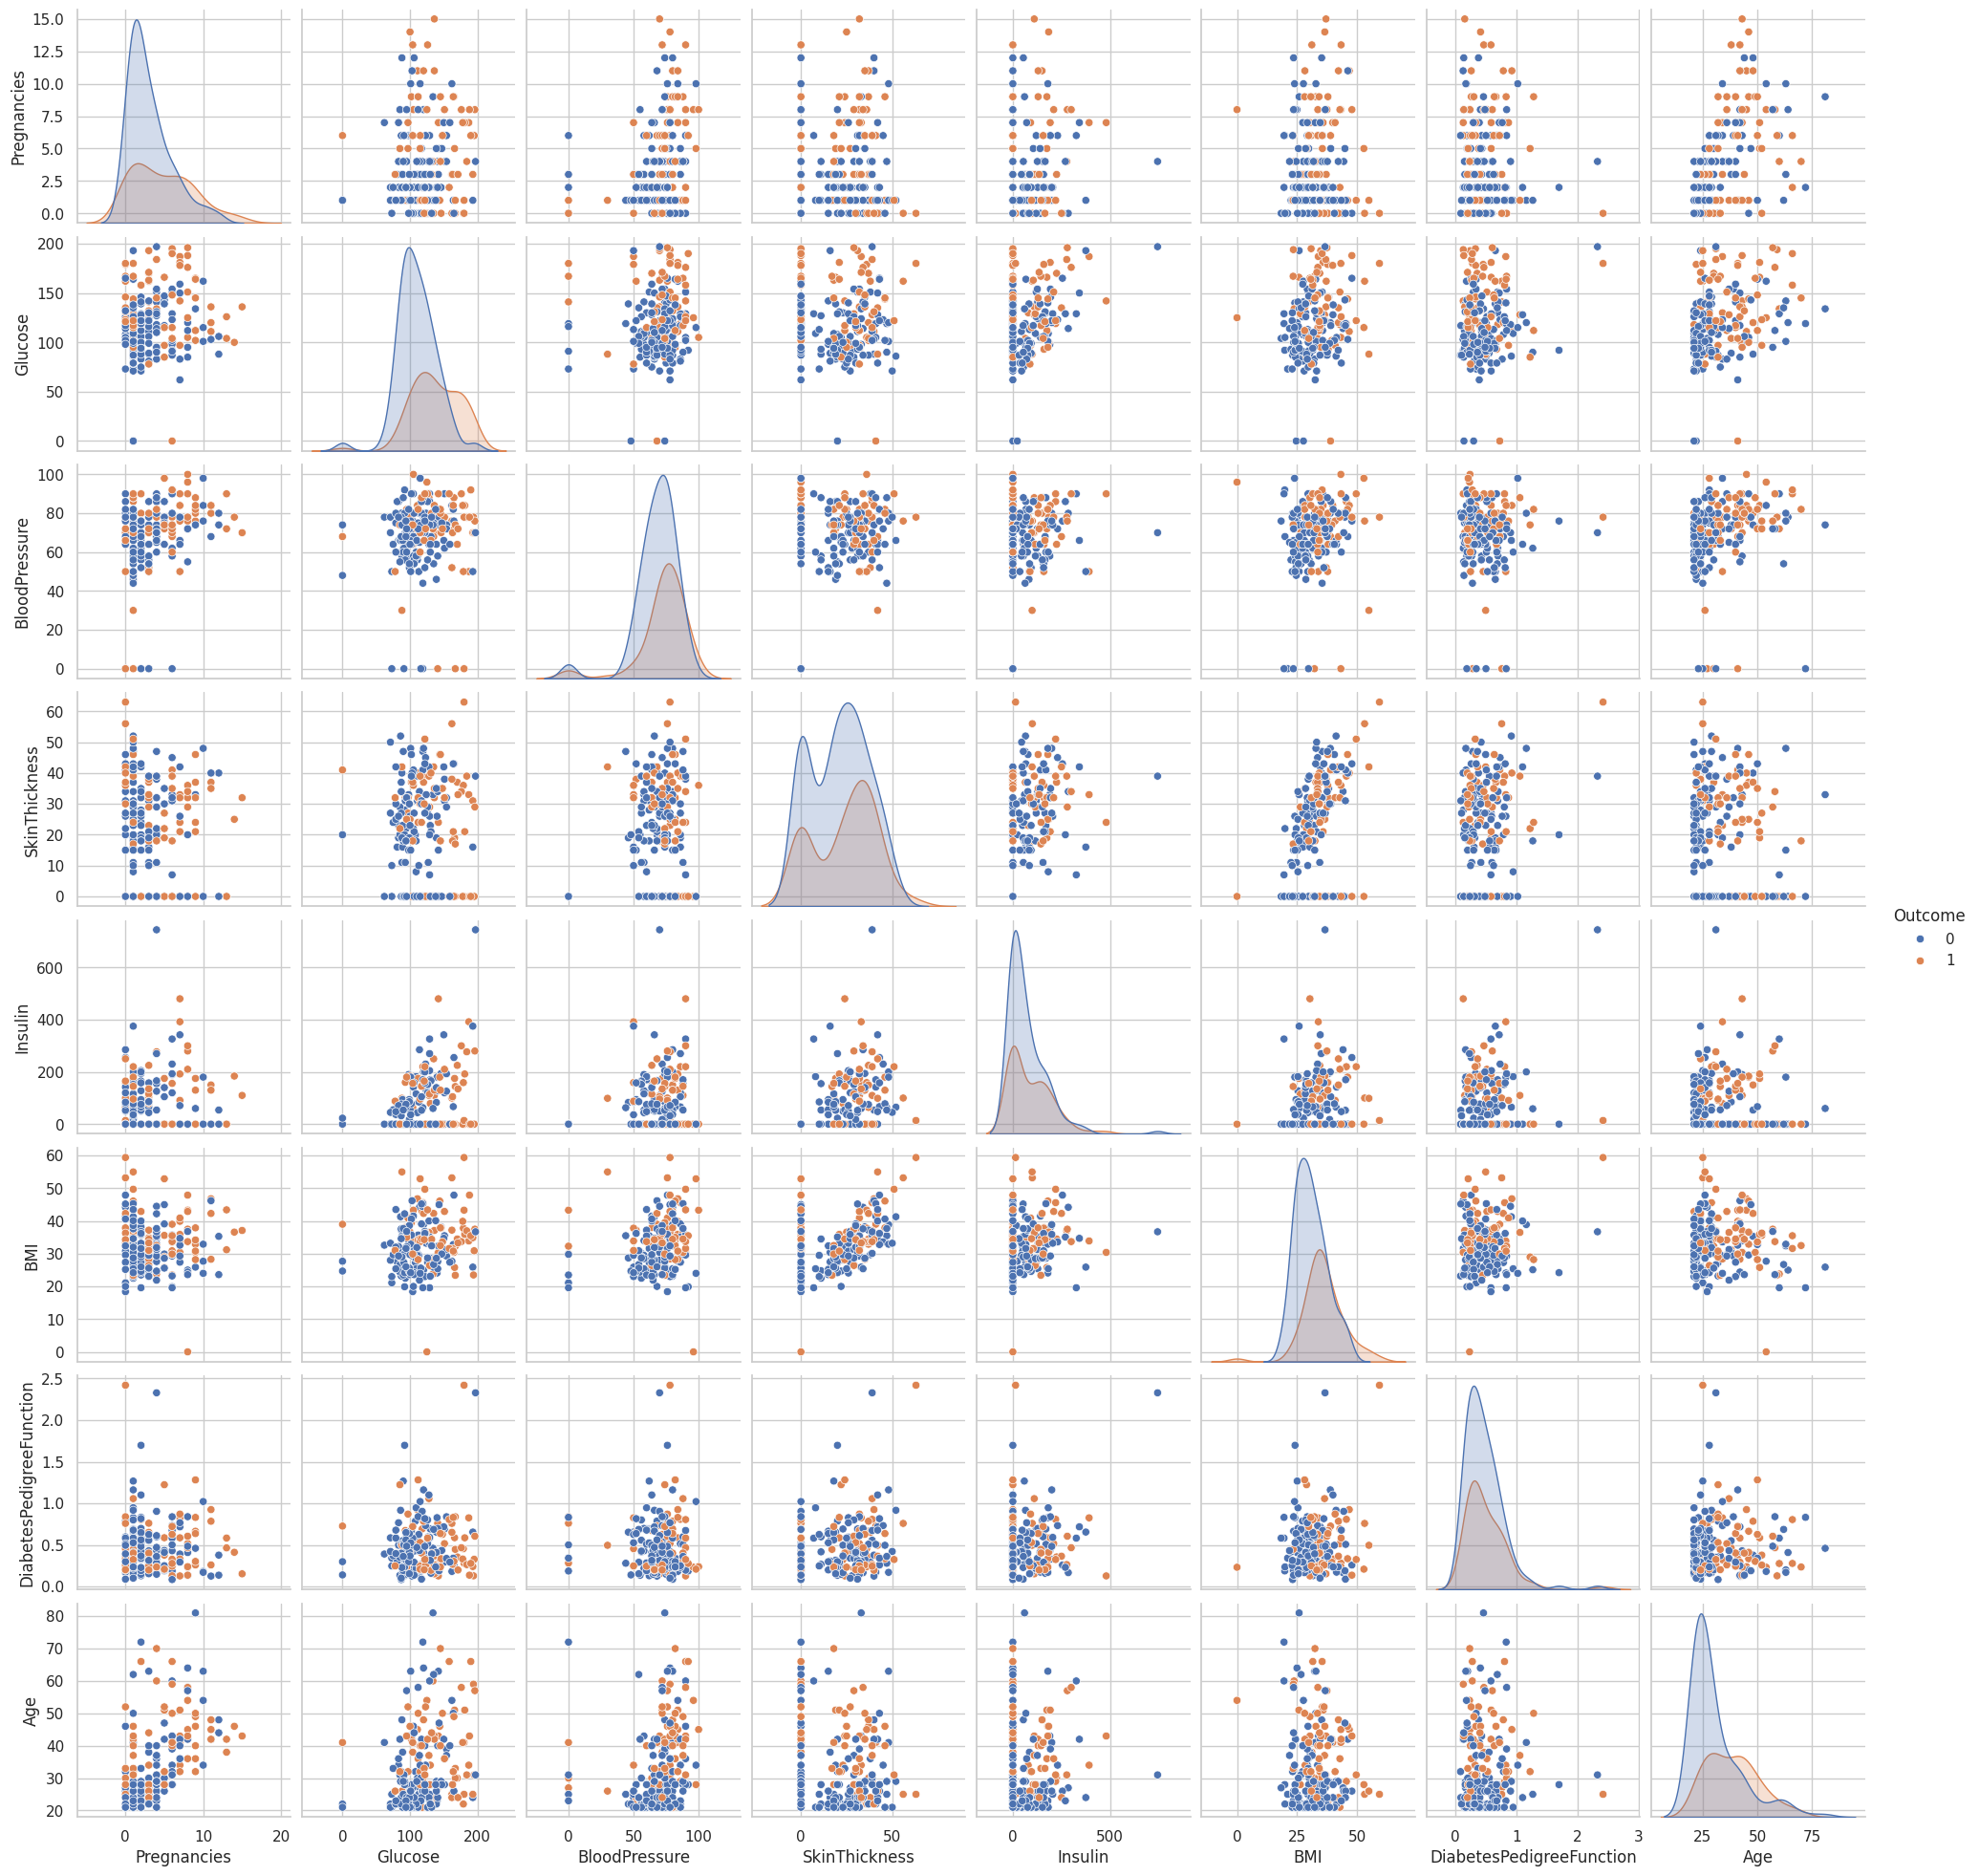

In [ ]:
import seaborn as sns

# visualización de pares de variables
sns.pairplot(df.sample(200), hue="Outcome")

### 8 Revision de filas duplicadas.

In [ ]:
# Revisar si hay filas duplicadas
n_duplicados = df.duplicated().sum()
print(f"Número de filas duplicadas en el dataset: {n_duplicados}")

Número de filas duplicadas en el dataset: 0


Filas duplicadas

- Se revisó el dataset y se encontró que el número de filas duplicadas es cero. Por lo que no es necesario eliminarlas en el preprocesamiento para evitar sesgos en el entrenamiento de modelos.


In [ ]:
# 9. Conclusiones iniciales
print("✅ EDA completado. Se identificaron posibles outliers y la clase está desbalanceada.")

### Resumen de hallazgos y decisiones de preprocesamiento

| Issue              | Variables afectadas                        | Solución propuesta           |
|--------------------|--------------------------------------------|------------------------------|
| Valores cero (fisiológicamente improbables) | Glucose, BloodPressure, SkinThickness, Insulin, BMI | Reemplazar ceros por NaN e imputar con la mediana |
| Desbalance de clase| Outcome                                    | Priorizar F1-score/Recall, considerar ajuste de pesos o técnicas de balanceo |
| Outliers           | Insulin, SkinThickness                     | Analizar su impacto y decidir tratamiento en preprocesamiento |
| Duplicados         | Todas                                       | No Existen         |


### Conclusiones del análisis exploratorio

- El dataset requiere preprocesamiento, especialmente para tratar valores faltantes implícitos (ceros) y posibles outliers.
- El desbalance de clases y la importancia de ciertas variables deben ser considerados en la etapa de modelado.